In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
%matplotlib inline

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/Telecom-Industry/main/Churn_train.csv')
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-LKXBR,Male,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.6,Yes
5630,3507-GASNP,Male,0,No,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.9,No
5631,8868-WOZGU,Male,0,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.5,Yes
5632,1251-KRREG,Male,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,Yes


In [3]:
df_test=pd.read_csv('https://raw.githubusercontent.com/smithaprakash91/Telecom-Industry/main/Churn_test.csv')
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-IEKQT,Male,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,105.95,2655.25
1405,4452-ROHMO,Female,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,331.6
1406,6164-HAQTX,Male,0,No,No,71,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),53.95,3888.65
1407,3982-DQLUS,Male,1,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,85.75,5688.45


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [5]:
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df_train['gender'].value_counts()

Male      2838
Female    2796
Name: gender, dtype: int64

In [8]:
df_train['gender'].replace(['Male', 'Female'], [0, 1], inplace = True)
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,1,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,0,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,0,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,0,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-LKXBR,0,1,No,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.6,Yes
5630,3507-GASNP,0,0,No,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.9,No
5631,8868-WOZGU,0,0,No,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.5,Yes
5632,1251-KRREG,0,0,No,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.1,Yes


In [9]:
df_train['MonthlyCharges'].value_counts()

20.05     46
19.90     39
20.00     36
20.15     35
19.70     34
          ..
35.30      1
117.15     1
54.00      1
52.50      1
116.15     1
Name: MonthlyCharges, Length: 1494, dtype: int64

In [10]:
df_train['MonthlyCharges'] = df_train['MonthlyCharges'].astype('int')

In [11]:
df_train['MonthlyCharges'].value_counts()

19    465
20    438
25    154
24    143
80    133
     ... 
42      4
31      3
28      2
37      1
22      1
Name: MonthlyCharges, Length: 99, dtype: int64

In [12]:
df_train['TotalCharges'].value_counts()

19.65      8
           8
19.9       7
20.2       7
19.75      6
          ..
1208.15    1
644.5      1
3694.7     1
1551.6     1
655.85     1
Name: TotalCharges, Length: 5291, dtype: int64

In [13]:
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')

In [14]:
df_train['TotalCharges'].dtypes

dtype('float64')

In [15]:
df_train.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges        int32
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df_train['Partner'].value_counts()

No     2932
Yes    2702
Name: Partner, dtype: int64

In [17]:
df_train['Partner'].replace(['No','Yes'], [0, 1], inplace = True)
df_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19,258.35,No
1,6261-RCVNS,1,0,0,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73,3160.55,Yes
2,2176-OSJUV,0,0,1,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65,4681.75,No
3,6161-ERDGD,0,0,1,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85,6300.85,No
4,2364-UFROM,0,0,0,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-LKXBR,0,1,0,No,9,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100,918.60,Yes
5630,3507-GASNP,0,0,0,Yes,60,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19,1189.90,No
5631,8868-WOZGU,0,0,0,No,28,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105,2979.50,Yes
5632,1251-KRREG,0,0,0,No,2,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,54,114.10,Yes


In [18]:
df_train['PhoneService'].value_counts()

Yes    5087
No      547
Name: PhoneService, dtype: int64

In [19]:
df_train['Dependents'].replace(['No','Yes'],[0,1], inplace=True)

In [20]:
df_train['PhoneService'].replace(['No','Yes'],[0,1],inplace=True)

In [21]:
df_train['InternetService'].value_counts()

Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64

In [22]:
df_train['InternetService'].replace(['Fiber optic','DSL','No'],[0,1,2],inplace=True)

In [23]:
df_train['MultipleLines'].replace(['No','Yes'],[0,1],inplace=True)

In [24]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,1,12,1,0,2,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19,258.35,No
1,6261-RCVNS,1,0,0,0,42,1,0,1,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73,3160.55,Yes
2,2176-OSJUV,0,0,1,0,71,1,1,1,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65,4681.75,No
3,6161-ERDGD,0,0,1,1,71,1,1,1,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85,6300.85,No
4,2364-UFROM,0,0,0,0,30,1,0,1,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70,2044.75,No


In [25]:
df_train['OnlineSecurity'].value_counts()

No                     2801
Yes                    1612
No internet service    1221
Name: OnlineSecurity, dtype: int64

In [27]:
df_train['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [29]:
df_train['DeviceProtection'].value_counts()

No                     2473
Yes                    1940
No internet service    1221
Name: DeviceProtection, dtype: int64

In [30]:
df_train['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [31]:
df_train['TechSupport'].value_counts()

No                     2781
Yes                    1632
No internet service    1221
Name: TechSupport, dtype: int64

In [32]:
df_train['TechSupport'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [33]:
df_train['StreamingTV'].value_counts()

No                     2246
Yes                    2167
No internet service    1221
Name: StreamingTV, dtype: int64

In [34]:
df_train['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [35]:
df_train['StreamingMovies'].value_counts()

No                     2213
Yes                    2200
No internet service    1221
Name: StreamingMovies, dtype: int64

In [36]:
df_train['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [37]:
df_train['Contract'].value_counts()

Month-to-month    3104
Two year          1344
One year          1186
Name: Contract, dtype: int64

In [38]:
df_train['Contract'].replace(['Month-to-month','Two year','One year'],[0,1,2],inplace=True)

In [39]:
df_train['PaperlessBilling'].value_counts()

Yes    3321
No     2313
Name: PaperlessBilling, dtype: int64

In [40]:
df_train['PaperlessBilling'].replace(['Yes','No'],[0,1],inplace=True)

In [41]:
df_train['PaymentMethod'].value_counts()

Electronic check             1893
Mailed check                 1305
Bank transfer (automatic)    1219
Credit card (automatic)      1217
Name: PaymentMethod, dtype: int64

In [42]:
df_train['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)

In [43]:
df_train['Churn'].value_counts()

No     4113
Yes    1521
Name: Churn, dtype: int64

In [44]:
df_train['Churn'].replace(['Yes','No'],[0,1],inplace=True)

In [45]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,1,12,1,0,2,2,...,2,2,2,2,1,1,1,19,258.35,1
1,6261-RCVNS,1,0,0,0,42,1,0,1,1,...,1,1,0,1,2,1,3,73,3160.55,0
2,2176-OSJUV,0,0,1,0,71,1,1,1,1,...,0,1,0,0,1,1,2,65,4681.75,1
3,6161-ERDGD,0,0,1,1,71,1,1,1,1,...,1,1,1,1,2,1,0,85,6300.85,1
4,2364-UFROM,0,0,0,0,30,1,0,1,1,...,0,1,1,0,2,1,0,70,2044.75,1


In [47]:
df_train['OnlineBackup'].value_counts()

No                     2498
Yes                    1915
No internet service    1221
Name: OnlineBackup, dtype: int64

In [48]:
df_train['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)

In [49]:
df_train.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges        int32
TotalCharges        float64
Churn                 int64
dtype: object

In [50]:
x=df_train.corr()
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.000579,0.005025,-0.013061,-0.008909,0.013742,-0.018542,-0.005296,0.001702,-0.009878,-0.013742,-0.010384,-0.009660,-0.011554,-0.009294,0.004810,0.017655,-0.003410,-0.015329
SeniorCitizen,-0.000579,1.000000,0.012169,-0.208738,0.023443,0.013908,-0.260025,-0.209943,-0.157055,-0.158020,-0.226086,-0.133297,-0.121275,-0.108870,-0.155178,-0.085558,0.225208,0.109925,-0.141966
Partner,0.005025,0.012169,1.000000,0.451545,0.383123,0.010001,-0.002133,0.077898,0.081709,0.089635,0.065679,0.071506,0.069950,0.206879,0.005570,0.126511,0.095561,0.315838,0.140414
Dependents,-0.013061,-0.208738,0.451545,1.000000,0.161319,-0.008210,0.183727,0.192372,0.163316,0.157455,0.180926,0.143785,0.130568,0.176765,0.110715,0.119742,-0.118576,0.062330,0.152236
tenure,-0.008909,0.023443,0.383123,0.161319,1.000000,0.004518,-0.038736,0.140760,0.174959,0.172834,0.135090,0.132592,0.135586,0.500916,-0.017574,0.338165,0.251149,0.828001,0.351885
PhoneService,0.013742,0.013908,0.010001,-0.008210,0.004518,1.000000,-0.093989,0.126061,0.151380,0.142775,0.120902,0.171645,0.165269,-0.009115,-0.018807,-0.008417,0.247692,0.110465,-0.021163
InternetService,-0.018542,-0.260025,-0.002133,0.183727,-0.038736,-0.093989,1.000000,0.763904,0.686810,0.678123,0.760977,0.620206,0.621431,0.194741,0.373521,0.173796,-0.905234,-0.429847,0.317882
OnlineSecurity,-0.005296,-0.209943,0.077898,0.192372,0.140760,0.126061,0.763904,1.000000,0.752084,0.747597,0.790190,0.701758,0.702645,0.263346,0.330769,0.209546,-0.621690,-0.154699,0.329801
OnlineBackup,0.001702,-0.157055,0.081709,0.163316,0.174959,0.151380,0.686810,0.752084,1.000000,0.743347,0.753454,0.722278,0.719083,0.243862,0.261408,0.171141,-0.538726,-0.085515,0.292221
DeviceProtection,-0.009878,-0.158020,0.089635,0.157455,0.172834,0.142775,0.678123,0.747597,0.743347,1.000000,0.764114,0.763629,0.768305,0.270316,0.266446,0.186213,-0.509627,-0.077038,0.280358


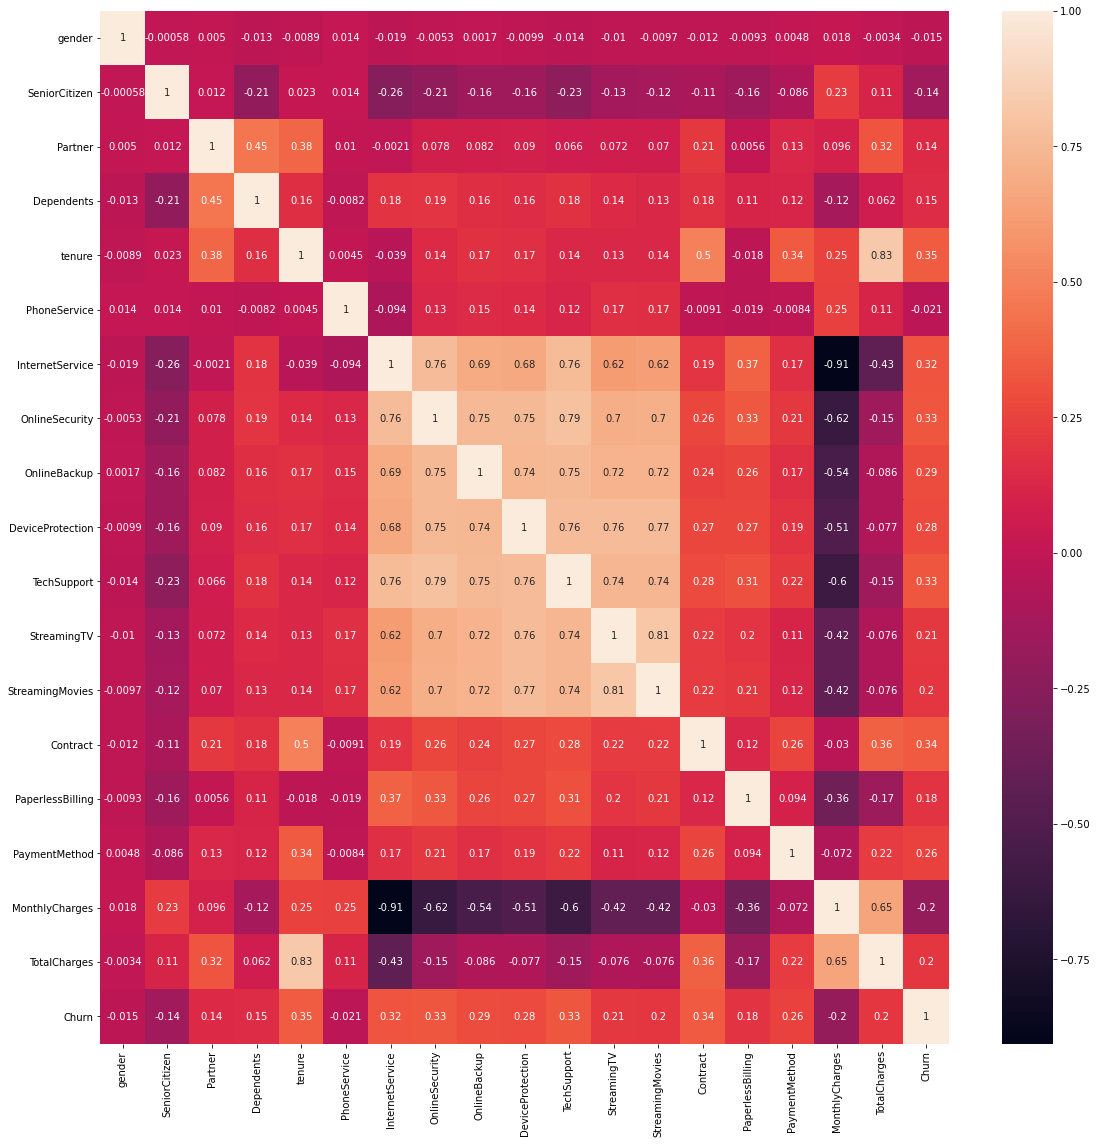

In [51]:
plt.figure(figsize=(19,19))
sns.heatmap(data=x, annot=True)

In [54]:
df_train.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [60]:
cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [61]:
X = df_train[cols]

In [62]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,0,0,1,1,12,1,0,2,2,...,2,2,2,2,1,1,1,19,258.35,1
1,6261-RCVNS,1,0,0,0,42,1,0,1,1,...,1,1,0,1,2,1,3,73,3160.55,0
2,2176-OSJUV,0,0,1,0,71,1,1,1,1,...,0,1,0,0,1,1,2,65,4681.75,1
3,6161-ERDGD,0,0,1,1,71,1,1,1,1,...,1,1,1,1,2,1,0,85,6300.85,1
4,2364-UFROM,0,0,0,0,30,1,0,1,1,...,0,1,1,0,2,1,0,70,2044.75,1


In [63]:
y=df_train['Churn']

In [64]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Churn, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1867,1986-PHGZF,0,1,0,0,18,1,1,1,1,...,0,0,0,0,0,0,3,58,964.90,1
1571,0670-KDOMA,1,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,1,20,20.25,1
5407,0363-QJVFX,0,0,0,0,32,1,1,0,1,...,0,1,1,1,0,0,3,108,3432.90,0
5047,0979-PHULV,0,0,1,1,69,1,1,0,0,...,1,0,1,1,0,0,3,99,7007.60,0
3528,7242-QZLXF,0,0,0,1,1,0,No phone service,1,0,...,0,0,0,0,0,0,0,25,25.30,0


In [67]:
X_train.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4507.000000,4502.000000,4507.000000
mean,0.496339,0.162858,0.481251,0.295318,32.148436,0.905258,0.769692,0.715775,0.765476,0.771688,0.715332,0.812958,0.821833,0.658087,0.408032,1.295984,64.604615,2288.055298,0.727979
std,0.500042,0.369277,0.499704,0.456236,24.508283,0.292890,0.777933,0.794582,0.779382,0.777238,0.794702,0.761554,0.757846,0.805015,0.491524,1.147873,30.085097,2271.533129,0.445050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,385.137500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.000000,1406.775000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,90.000000,3832.900000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.000000,8670.100000,1.000000


In [68]:
X_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4085,1045-LTCYT,1,0,1,1,8,1,0,2,2,...,2,2,2,2,0,1,3,21,139.75,1
2689,2037-XJFUP,0,0,1,0,33,1,0,0,0,...,1,0,1,1,2,0,0,95,3036.75,0
2655,5124-EOGYE,0,0,0,0,31,1,0,2,2,...,2,2,2,2,1,1,1,20,638.55,1
3888,0581-BXBUB,1,1,0,0,4,1,0,0,0,...,0,0,0,0,0,1,0,72,317.75,1
1507,7492-TAFJD,0,0,1,1,7,0,No phone service,1,1,...,1,0,0,0,1,1,1,38,280.00,1


In [69]:
X_test.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1124.000000,1127.000000
mean,0.496007,0.157941,0.472937,0.297249,32.795918,0.893523,0.804791,0.734694,0.804791,0.802130,0.754215,0.838509,0.832298,0.665484,0.420586,1.377995,63.162378,2251.051246,0.738243
std,0.500206,0.364848,0.499489,0.457250,24.746155,0.308585,0.783406,0.807202,0.783406,0.784437,0.801263,0.769425,0.772130,0.797914,0.493872,1.149165,30.173938,2246.455491,0.439786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,19.050000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,417.737500,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,69.000000,1334.825000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,88.500000,3683.775000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,117.000000,8684.800000,1.000000


In [70]:
y_train.head()

1867    1
1571    1
5407    0
5047    0
3528    0
Name: Churn, dtype: int64

In [71]:
y_train.describe()

count    4507.000000
mean        0.727979
std         0.445050
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [72]:
y_test.head()

4085    1
2689    0
2655    1
3888    1
1507    1
Name: Churn, dtype: int64

In [73]:
y_test.describe()

count    1127.000000
mean        0.738243
std         0.439786
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [76]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression().fit(X_train, y_train)

In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [79]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression() 
clf.fit(X_train, y_train)

LogisticRegression()

In [80]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [81]:
y_pred_train = clf.predict(X_train)

In [82]:
y_pred_test = clf.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 1.0


In [84]:
output = pd.DataFrame({'customerID': df_test.index,'Churn': y_pred_test})
output.to_csv('telecom_chrun.csv', index=False, header=False)